#### Homework 08 - Build models that predict whether an individual is a high-earner by observing some of their characteristic

In [1]:
# Load libraries 
# Basic packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To ignore several specific warnings
#import warnings
#warnings.filterwarnings("ignore")

In [2]:
# ML packages:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix # old commands
from sklearn.metrics import ConfusionMatrixDisplay

#### Data Description

In [3]:
## Import the dataset 
df = pd.read_csv('HW8_income.csv')
df.shape
df.head()

,Age,Workclass,FNLWGT,Education,EducationLevel,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Salary
0,62,Local-gov,68268,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
1,50,Private,215990,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
2,36,Private,185405,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K
3,64,Private,258006,Some-college,10,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,40,Cuba,<=50K
4,28,Self-emp-not-inc,39388,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K


#### Create a new variable from the dependent variable

In [4]:
# Create a new column 'HighIncome' based on 'Salary'
# df['HighIncome'] = df['Salary'].apply(lambda x: 1 if x == '>50K' else 0) --- Doesn't do the mapping
df['HighIncome'] = df['Salary'].map(lambda x : 1 if '>50K' in x else 0)

# Display the first few rows of the DataFrame to verify
print(df.head())

   Age          Workclass  FNLWGT      Education  EducationLevel  \
0   62          Local-gov   68268        HS-grad               9   
1   50            Private  215990        HS-grad               9   
2   36            Private  185405        HS-grad               9   
3   64            Private  258006   Some-college              10   
4   28   Self-emp-not-inc   39388      Assoc-voc              11   

         MaritalStatus         Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse   Transport-moving         Husband   White     Male   
1   Married-civ-spouse       Craft-repair         Husband   White     Male   
2   Married-civ-spouse       Adm-clerical         Husband   White     Male   
3              Widowed       Adm-clerical   Not-in-family   White   Female   
4   Married-civ-spouse    Farming-fishing         Husband   White     Male   

   CapitalGain  CapitalLoss  HoursPerWeek   NativeCountry  Salary  HighIncome  
0            0            0            40 

In [5]:
# Elementary Data Analysis
df.shape
df.Salary.value_counts()
df.HighIncome.value_counts()

0    3084
1     916
Name: HighIncome, dtype: int64

In [6]:
# Check for missing data in each column
df.isnull().sum() # No NAs in this dataset
df[df.duplicated()] # No duplicate rows

,Age,Workclass,FNLWGT,Education,EducationLevel,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Salary,HighIncome
529,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K,0
2754,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K,0


In [7]:
# check for missing data
# convert  MaritalStatus and assign each level a numerical number. 
# Sex is also another important predictor 

In [8]:
# df.Relationship.value_counts()

In [9]:
# Transform the 
df['Gender'] = df['Sex'].map(lambda x : 1 if 'Male' in x else 0)
df.head(3)

,Age,Workclass,FNLWGT,Education,EducationLevel,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Salary,HighIncome,Gender
0,62,Local-gov,68268,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K,0,1
1,50,Private,215990,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K,1,1
2,36,Private,185405,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K,1,1


In [10]:
df.head()

,Age,Workclass,FNLWGT,Education,EducationLevel,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Salary,HighIncome,Gender
0,62,Local-gov,68268,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K,0,1
1,50,Private,215990,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K,1,1
2,36,Private,185405,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K,1,1
3,64,Private,258006,Some-college,10,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,40,Cuba,<=50K,0,0
4,28,Self-emp-not-inc,39388,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K,0,1


In [11]:
# Create a new variable "Ethnicity" with values 1 for "White" and 0 for other races
df['Ethnicity'] = df['Race'].apply(lambda x: 1 if x.strip().lower() == 'white' else 0)

# Check the value counts of the new variable
print(df['Ethnicity'].value_counts())

1    3401
0     599
Name: Ethnicity, dtype: int64


#### Split data into train and test 

In [12]:
# Define X and Y coordinates 
y = df['HighIncome']
x = df.loc[:, df.columns.isin(['Age','EducationLevel','HoursPerWeek','CapitalGain','Gender','Ethnicity'])]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=666)
y_test.sample(3)

3033    0
3011    0
333     0
Name: HighIncome, dtype: int64

#### (A) Build a Logistic Regression predictive model for individual’s income level. Use model predictions on the test sample to create a confusion matrix and calculate the accuracy score, precision, and recall ratios.

In [13]:
lr = LogisticRegression(penalty='l2', C=100, max_iter=100) # max_iter=100 or 1000
lr.fit(x_train, y_train)

/Users/apple/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

##### Confusion matrix 

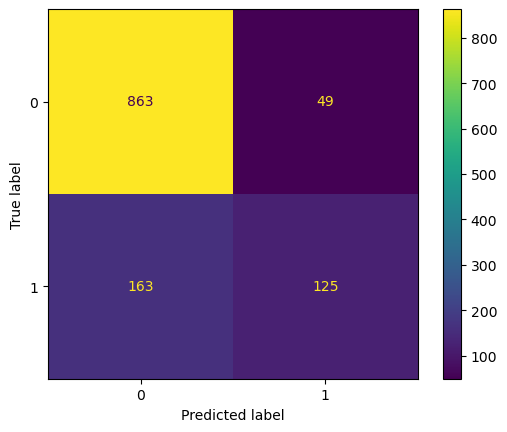

In [14]:
# plot_confusion_matrix(lr, x_test, y_test) #old command
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)

### Accuracy score and classification report

Definitions:
+ Accuracy score: the proportion of correct predictions.
+ Precision: the proportion of the prediction that is actually correct.
+ Recall: the proportion of actual class of a label that is identified correctly.
+ f1-score: harmonic mean of Precision and Recall. 
(Note: Harmonic mean is: n / (1/x1 + 1/x2 + ... + 1/xn).
It gives more weight to smaller values in the set of numbers. This means that if one or more of the numbers in the set are very small, the harmonic mean will be closer to that small value than to the larger values in the set.)
+ Support: the number of occurrences of each particular class in the true responses (responses in your test set).

In [15]:
y_pred = lr.predict(x_test)

lr_score = accuracy_score(y_test, y_pred)
print(f'LR Accuracy Score = {lr_score}')

print('LR Classification Report:')
print(classification_report(y_test, y_pred))

LR Accuracy Score = 0.8233333333333334
LR Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       912
           1       0.72      0.43      0.54       288

    accuracy                           0.82      1200
   macro avg       0.78      0.69      0.72      1200
weighted avg       0.81      0.82      0.81      1200



#### Re-run Logit adding a balancing effect for the unbalanced predicted class, 22.9%

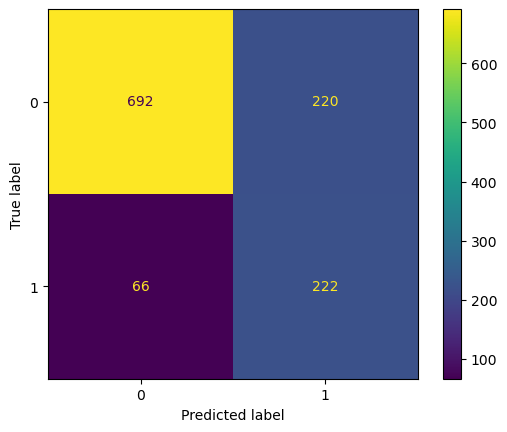

In [16]:
lr = LogisticRegression(penalty='l2', C=100, max_iter=5000, class_weight='balanced')
lr.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)

#### (B) Build a K-Nearest Neighbors classification model for individual’s income level. Use model predictions on the test sample to create a confusion matrix and calculate the accuracy score, precision, and recall ratios.

In [17]:
# use n=3 and compare with rule of thumb: n=sqrt(20000)/2=70
knc = KNeighborsClassifier(n_neighbors=3) 
knc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Confusion Matrix

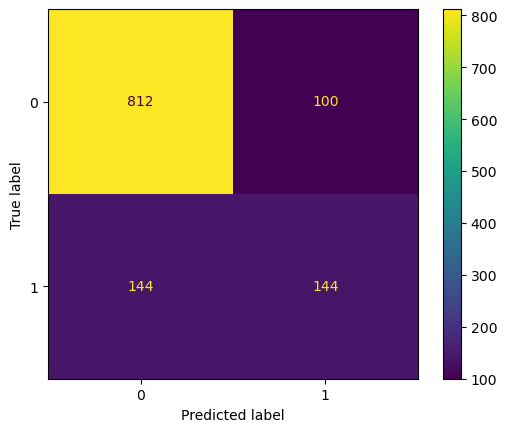

In [18]:
ConfusionMatrixDisplay.from_estimator(knc, x_test, y_test)

### Accuracy score and classification report

Definitions:
+ Accuracy score: the proportion of correct predictions.
+ Precision: the proportion of the prediction that is actually correct.
+ Recall: the proportion of actual class of a label that is identified correctly.
+ f1-score: harmonic mean of Precision and Recall.
+ Support: the number of occurrences of each particular class in the true responses (responses in your test set).

In [19]:
y_pred = knc.predict(x_test)

knc_score = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy Score = {knc_score}')

print('KNN Classification Report:')
print(classification_report(y_test, y_pred))

KNN Accuracy Score = 0.7966666666666666
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       912
           1       0.59      0.50      0.54       288

    accuracy                           0.80      1200
   macro avg       0.72      0.70      0.71      1200
weighted avg       0.79      0.80      0.79      1200



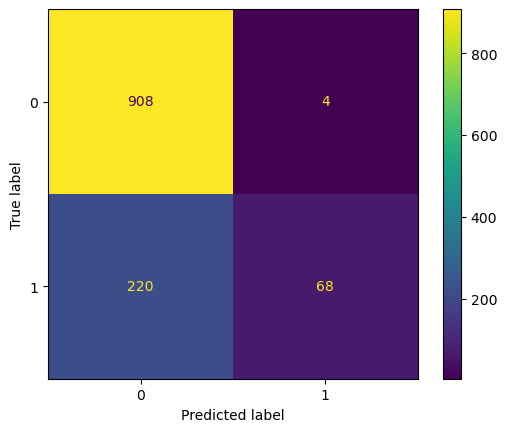

In [20]:
# Compare with rule of thumb: n=sqrt(20000)/2=70
knc = KNeighborsClassifier(n_neighbors=70) 
knc.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(knc, x_test, y_test)

#### (C) Build a Support Vector Machine classifier for individual’s income level. Use model predictions on the test sample to create a confusion matrix and calculate the accuracy score, precision, and recall ratios.

In [21]:
#NOTE 1: Start with default kernel='rbf' then move to 'linear'
#NOTE 2: class_weight='balanced' increases the recall rate to 85%
svc = SVC(kernel='rbf', C=10, random_state=666) #class_weight='balanced'
svc.fit(x_train, y_train)

SVC(C=10, random_state=666)

#### Confusion Matrix 

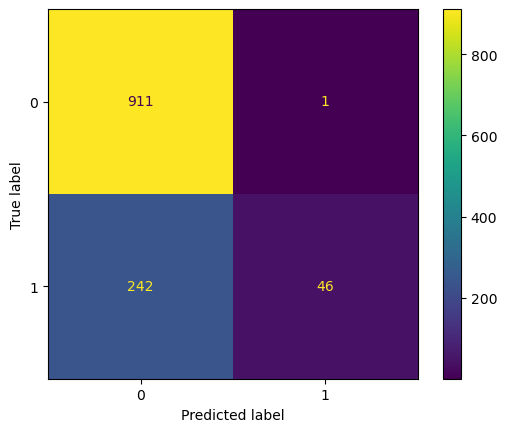

In [22]:
ConfusionMatrixDisplay.from_estimator(svc, x_test, y_test)

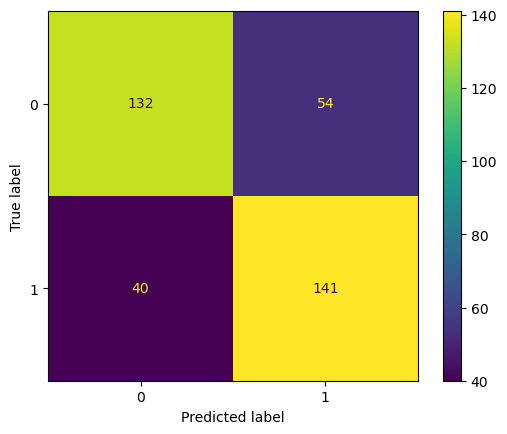

In [35]:
svc = SVC(kernel='linear', C=10, random_state=666) #class_weight='balanced'
svc.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(svc, x_test, y_test)

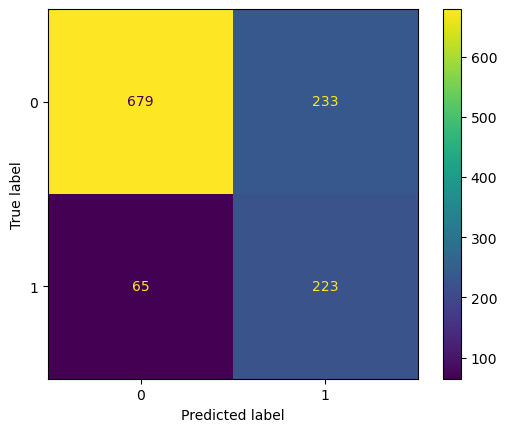

In [24]:
## Re-run SVM with the balanced term for the predictive class

svc = SVC(kernel='linear', C=10, class_weight='balanced', random_state=666) #class_weight='balanced'
svc.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(svc, x_test, y_test)

### Accuracy score and classification report

In [25]:
y_pred = svc.predict(x_test)

svc_score = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy Score = {svc_score}')

print('SVM Classification Report:')
print(classification_report(y_test, y_pred))

SVM Accuracy Score = 0.7516666666666667
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82       912
           1       0.49      0.77      0.60       288

    accuracy                           0.75      1200
   macro avg       0.70      0.76      0.71      1200
weighted avg       0.81      0.75      0.77      1200



## Balancing the sample by random under-sampling of the majority class

To balance your dataset by randomly under-sampling the majority class, you can use the imbalanced-learn library, which is specifically designed for dealing with imbalanced datasets.

First, install the `imbalanced-learn` package if you haven't already using pip install.

Then:

+ `RandomUnderSampler` is initialized with a random_state for reproducibility.
+ `fit_resample` method is used on the training data to balance it by under-sampling.

After resampling, you can see the new distribution of your classes by printing the counts, which should now be equal or at least significantly more balanced.

**Note:** Keep in mind that under-sampling can lead to a loss of information because it reduces the size of the majority class to match the minority class. Depending on your specific case, you might also want to consider over-sampling the minority class or using synthetic data generation techniques like SMOTE (Synthetic Minority Over-sampling Technique) available in the same `imbalanced-learn` library.

In [26]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.0
    Uninstalling imbalanced-learn-0.12.0:
      Successfully uninstalled imbalanced-learn-0.12.0
Note: you may need to restart the kernel to use updated packages.


In [27]:
from imblearn.under_sampling import RandomUnderSampler

In [28]:
rus = RandomUnderSampler(random_state=101)

In [29]:
x_res, y_res = rus.fit_resample(x, y)
y_res.value_counts()

0    916
1    916
Name: HighIncome, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2,
                                                    random_state=101)

#### Re-run logistic Regression

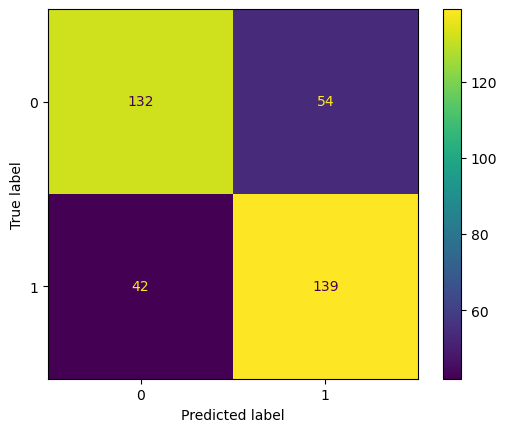

In [31]:
lr2 = LogisticRegression(C=100, max_iter=1000) # Adjust max_iter based on your needs
lr2.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(lr2, x_test, y_test)

#### Re-run KNN

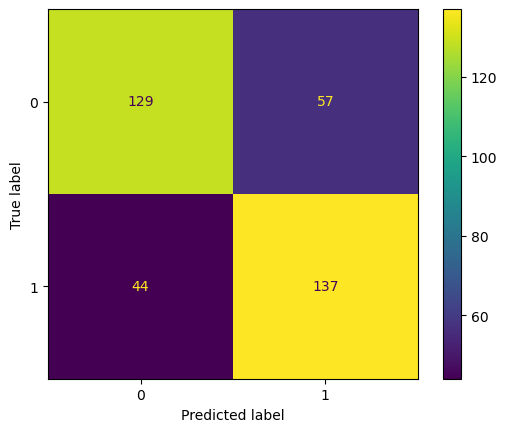

In [32]:
knc2 = KNeighborsClassifier(n_neighbors=3) 
knc2.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(knc2, x_test, y_test)

In [33]:
y_pred = knc2.predict(x_test)

knc_score = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy Score = {knc_score}')

print('KNN Classification Report:')
print(classification_report(y_test, y_pred))

KNN Accuracy Score = 0.7247956403269755
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       186
           1       0.71      0.76      0.73       181

    accuracy                           0.72       367
   macro avg       0.73      0.73      0.72       367
weighted avg       0.73      0.72      0.72       367



#### (D) Rank the models based on their performance. Can you explain the differences in model performances based on each model’s pros and cons?